## ライブラリの読み込み

In [18]:
import pandas as pd
import numpy as np
import pymatgen as mg
from pymatgen.electronic_structure.plotter import BSPlotter, DosPlotter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import tqdm
import pickle
import os

## Materials Projectの全データCSVの読み込み

In [19]:
mpalldata = pd.read_csv('hato_datasets_xy_CrySys.csv', index_col=0)

In [20]:
mpalldata = mpalldata.set_index("mpid")

In [21]:
#CrystalSystemを数字化する辞書作成
cslist = list(mpalldata["Crystal System"].unique())
csnum = list(range(len(cslist)))
csdict = dict(zip(cslist,csnum))
csdict


{'tetragonal': 0,
 'cubic': 1,
 'trigonal': 2,
 'monoclinic': 3,
 'hexagonal': 4,
 'orthorhombic': 5,
 'triclinic': 6}

In [22]:
f_str2num = lambda x: csdict[x]
mpalldata["cs_num"] = mpalldata["Crystal System"].apply(f_str2num)

In [23]:
mpalldata

,formula,e_hull,gap pbe,mu_b,elastic anisotropy,bulk modulus,shear modulus,structure,e_form,initial structure,sg_symbol,sg_num,xrd_x,xrd_y,Crystal System,cs_num
mpid,,,,,,,,,,,,,,,,
mp-85,In,0.003319,0.0000,2.700000e-05,1.044699,33.154748,4.904836,"{'@module': 'pymatgen.core.structure', '@class...",0.003319,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[32.330742843538374, 37.50502035236625, 54.083...","[100.0, 49.92938574826252, 33.52945689018866, ...",tetragonal,0
mp-639755,Rb,0.009017,0.0000,1.805000e-04,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.009017,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[21.532913615272474, 22.657887597027432, 30.63...","[56.532038666792126, 100.00000000000001, 23.21...",tetragonal,0
mp-569289,Hg,0.007526,0.0000,-2.500000e-06,1.224989,8.500236,2.913088,"{'@module': 'pymatgen.core.structure', '@class...",0.007526,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[30.54180118081431, 32.95023449689478, 43.7372...","[60.73225325510433, 100.0, 23.24527154480579, ...",tetragonal,0
mp-1056579,Si,0.484841,0.0000,1.000000e-07,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.484841,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[37.94561347276035, 44.350129330306515, 54.746...","[79.97048396992744, 100.0, 26.312492485741455,...",tetragonal,0
mp-974920,Na,0.002600,0.0000,-1.739000e-04,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.002600,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[29.249921926130114, 32.58071721314504, 34.545...","[100.0, 18.67886212541886, 31.724771737787158,...",tetragonal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-23857,CoCuH18N6Cl5,0.006144,0.4954,7.999830e+00,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",-0.773114,"{'@module': 'pymatgen.core.structure', '@class...",Fd-3c,228,"[11.220159259146211, 13.75287734427288, 15.893...","[0.7035032803368115, 1.4281277684686506, 100.0...",cubic,1
mp-24013,CrCuH18N6Cl5,0.003031,0.5223,3.200000e+01,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",-0.818846,"{'@module': 'pymatgen.core.structure', '@class...",Fd-3c,228,"[11.121960570702896, 13.632320618291791, 15.75...","[0.6059423693366579, 5.683694250566078, 100.0,...",cubic,1
mp-24198,CrHgH18N6Cl5,0.000000,2.6843,2.399999e+01,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",-0.831574,"{'@module': 'pymatgen.core.structure', '@class...",Fd-3c,228,"[10.852345977870781, 13.301345368779407, 15.37...","[0.2977481853767556, 44.78400780157401, 100.0,...",cubic,1


In [24]:
mpalldata.head(2)

,formula,e_hull,gap pbe,mu_b,elastic anisotropy,bulk modulus,shear modulus,structure,e_form,initial structure,sg_symbol,sg_num,xrd_x,xrd_y,Crystal System,cs_num
mpid,,,,,,,,,,,,,,,,
mp-85,In,0.003319,0.0,0.000027,1.044699,33.154748,4.904836,"{'@module': 'pymatgen.core.structure', '@class...",0.003319,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[32.330742843538374, 37.50502035236625, 54.083...","[100.0, 49.92938574826252, 33.52945689018866, ...",tetragonal,0
mp-639755,Rb,0.009017,0.0,0.000180,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.009017,"{'@module': 'pymatgen.core.structure', '@class...",I4/mmm,139,"[21.532913615272474, 22.657887597027432, 30.63...","[56.532038666792126, 100.00000000000001, 23.21...",tetragonal,0


In [25]:
#X線回折パターンが無いものを削除
mpalldata = mpalldata[mpalldata["xrd_x"]!='[]']

In [26]:
mpalldata.shape

(63644, 16)

In [27]:
mpidlist = list(mpalldata.index)

## 入力ベクトルの生成（ここを色々変えて検証する）

In [28]:
xrdcalc = XRDCalculator()
inputlist = []
totalpeaks = []
numofpeak = 10
for index, row in mpalldata.iterrows():
    try:
        x = np.array(eval(row['xrd_x']))
        y = np.array(eval(row['xrd_y']))
        
        totalpeaks.append(len(x))
        inputlist.append(list(np.sort(x[np.argsort(y)[::-1][:numofpeak]])))
    except:
        inputlist.append([])

In [29]:
df_input = pd.DataFrame(inputlist)

In [30]:
inputsize = numofpeak

In [31]:
#情報の追加
#inputsizeは追加した分だけ数字を足す

#inputsize = numofpeak + 1
#df_input["totalpeaks"] =  totalpeaks

In [32]:
df_input = df_input.set_index(pd.Series(mpidlist))

In [33]:
df_input = df_input.fillna(0)

In [34]:
df_input.head()

,0,1,2,3,4,5,6,7,8,9
mp-85,32.330743,37.505020,54.083897,64.432445,67.672512,80.026075,88.958593,0.000000,0.000000,0.000000
mp-639755,21.532914,22.657888,30.636929,38.442247,40.440583,46.268013,49.380364,49.935543,59.730845,61.190004
mp-569289,30.541801,32.950234,43.737294,55.829282,60.309503,63.574448,69.110105,72.164015,73.490286,89.616391
mp-1056579,37.945613,44.350129,54.746884,73.006034,73.552539,81.119207,85.886595,0.000000,0.000000,0.000000
mp-974920,29.249922,32.580717,34.545462,48.217082,49.657673,56.098695,58.677830,60.660293,78.163650,78.801352


In [35]:
df_concat = pd.concat([mpalldata,df_input],axis=1)

In [36]:
df_concat.shape

(63644, 26)

In [37]:
df_concat.head()

,formula,e_hull,gap pbe,mu_b,elastic anisotropy,bulk modulus,shear modulus,structure,e_form,initial structure,...,0,1,2,3,4,5,6,7,8,9
mp-85,In,0.003319,0.0,2.700000e-05,1.044699,33.154748,4.904836,"{'@module': 'pymatgen.core.structure', '@class...",0.003319,"{'@module': 'pymatgen.core.structure', '@class...",...,32.330743,37.505020,54.083897,64.432445,67.672512,80.026075,88.958593,0.000000,0.000000,0.000000
mp-639755,Rb,0.009017,0.0,1.805000e-04,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.009017,"{'@module': 'pymatgen.core.structure', '@class...",...,21.532914,22.657888,30.636929,38.442247,40.440583,46.268013,49.380364,49.935543,59.730845,61.190004
mp-569289,Hg,0.007526,0.0,-2.500000e-06,1.224989,8.500236,2.913088,"{'@module': 'pymatgen.core.structure', '@class...",0.007526,"{'@module': 'pymatgen.core.structure', '@class...",...,30.541801,32.950234,43.737294,55.829282,60.309503,63.574448,69.110105,72.164015,73.490286,89.616391
mp-1056579,Si,0.484841,0.0,1.000000e-07,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.484841,"{'@module': 'pymatgen.core.structure', '@class...",...,37.945613,44.350129,54.746884,73.006034,73.552539,81.119207,85.886595,0.000000,0.000000,0.000000
mp-974920,Na,0.002600,0.0,-1.739000e-04,NaN,NaN,NaN,"{'@module': 'pymatgen.core.structure', '@class...",0.002600,"{'@module': 'pymatgen.core.structure', '@class...",...,29.249922,32.580717,34.545462,48.217082,49.657673,56.098695,58.677830,60.660293,78.163650,78.801352


## 学習、検証

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
#かなり時間がかかるかも
k=5
kfold = KFold(n_splits=k,shuffle=True,random_state=0)
targetlist=["cs_num"]#["sg_num"]#["cs_num"]#["bulk modulus"]#,"Electrical conductivity","Thermal conductivity","ZT"]
results = {}
for target in tqdm.tqdm(targetlist):
    #clear_output(wait = True)
    df_tmp = df_concat.dropna(subset=[target]).copy()
    train_x_tmp = df_tmp.iloc[:,-1*inputsize:].copy() # 説明変数のみにする
    train_y_tmp = df_tmp[target].copy()
    r2list=[]
    rmselist = []
    maelist = []
    raelist = []
    rselist = []
    predlist = []
    truelist = []
    modellist = []
    Xtestlist = []
    ytestlist = []
    best_params = []
    for train_index, test_index in kfold.split(train_x_tmp):
        X_train, X_test = np.array(train_x_tmp)[train_index], np.array(train_x_tmp)[test_index]
        y_train, y_test = np.array(train_y_tmp)[train_index], np.array(train_y_tmp)[test_index]
        #random_forest = RFR(n_estimators=100,criterion='mse',n_jobs=-1,max_features="sqrt",random_state=0)#(max_depth=10, n_estimators=10, random_state=0)#ほしい値は分類ではなく連続値なのでRFCではなくRFR
        random_forest = RFC(n_estimators=100, n_jobs=-1,random_state=0)
        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)
        predlist.append(y_pred)
        truelist.append(y_test)
        modellist.append(random_forest)
        r2list.append(r2_score(y_test, y_pred))
        rmselist.append(np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred)))
        maelist.append(mean_absolute_error(y_test,y_pred))
        raelist.append(np.sum(np.abs(y_pred - y_test))/np.sum(np.abs(y_test - np.mean(y_test))))
        rselist.append(np.sum((y_pred - y_test)**2)/np.sum((y_test - np.mean(y_test))**2))
        Xtestlist.append(X_test)
        ytestlist.append(y_test)
    selectindex = np.argmax(r2list) #argがついてるやつはindexを返してくれるやつ
    results.setdefault(target,{"Xtestlist":Xtestlist[selectindex],"ytestlist":ytestlist[selectindex],"model":modellist[selectindex],"selectindex":selectindex,"r2list":r2list,"raelist":raelist,"rmselist":rmselist,"maelist":maelist,"rselist":rselist})

100%|██████████| 1/1 [00:35<00:00, 35.26s/it]


## 分類(RFC)の場合の精度評価

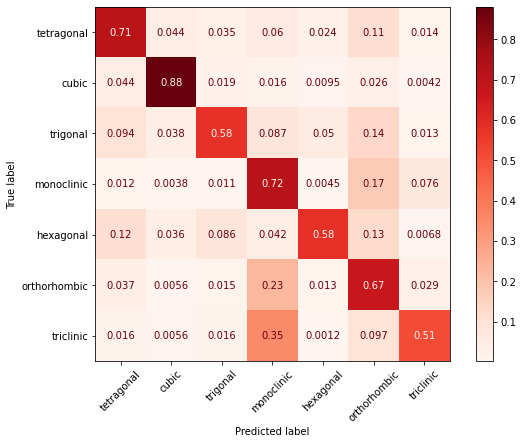

In [40]:
#混同行列の表示
fig = plt.figure(figsize=(8.0, 6.0))
ax = fig.add_subplot(111)
for i, tg in enumerate(targetlist):
    plot_confusion_matrix(results[tg]["model"],results[tg]["Xtestlist"], results[tg]["ytestlist"],display_labels=cslist,cmap=plt.cm.Reds,normalize='true',ax = ax)
    #plot_confusion_matrix(results[tg]["model"],results[tg]["Xtestlist"], results[tg]["ytestlist"],cmap=plt.cm.Reds,normalize='true')
plt.xticks(rotation=45)        
plt.tight_layout(pad=0.1, w_pad=1, h_pad=1.0)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

for i, tg in enumerate(targetlist):
    pred = results[tg]["model"].predict(results[tg]["Xtestlist"])
    true = results[tg]["ytestlist"]
    print(classification_report(true, pred,target_names=cslist))
    #print(classification_report(true, pred))

              precision    recall  f1-score   support

  tetragonal       0.71      0.71      0.71      1609
       cubic       0.90      0.88      0.89      1899
    trigonal       0.69      0.58      0.63      1080
  monoclinic       0.56      0.72      0.63      2660
   hexagonal       0.79      0.58      0.67      1026
orthorhombic       0.63      0.67      0.65      2852
   triclinic       0.71      0.51      0.59      1603

    accuracy                           0.68     12729
   macro avg       0.71      0.66      0.68     12729
weighted avg       0.69      0.68      0.68     12729

